In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

In [2]:
df_2015 = pd.read_csv("2015.csv")
df_2015["Year"] = 2015

df_2016 = pd.read_csv("2016.csv")
df_2016["Year"] = 2016

df_2017 = pd.read_csv("2017.csv")
df_2017["Year"] = 2017

df_2018 = pd.read_csv("2018.csv")
df_2018["Year"] = 2018

df_2019 = pd.read_csv("2019.csv")
df_2019["Year"] = 2019

data = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019], ignore_index=True)
data

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,Trust..Government.Corruption.,Dystopia.Residual,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Perceptions of corruption
0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,152.0,Rwanda,3.334,0.359,0.711,0.614,0.555,0.411
778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,153.0,Tanzania,3.231,0.476,0.885,0.499,0.417,0.147
779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,154.0,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.025
780,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,155.0,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.035


In [3]:
print("total rows", len(data))
print(data.columns.tolist())

total rows 782
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual', 'Year', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Trust..Government.Corruption.', 'Dystopia.Residual', 'Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption']


In [4]:
if "Country or region" in data.columns:
    data["Country"] = data["Country"].combine_first(data["Country or region"])

rank_cols = ["Happiness Rank", "Happiness.Rank", "Overall rank"]
for col in rank_cols:
    if col in data.columns:
        data["Rank"] = data.get("Rank", pd.Series(index=data.index)).combine_first(data[col])

if "Dystopia Residual" in data.columns and "Dystopia.Residual" in data.columns:
    data["Dystopia"] = data["Dystopia Residual"].combine_first(data["Dystopia.Residual"])
elif "Dystopia Residual" in data.columns:
    data["Dystopia"] = data["Dystopia Residual"]
elif "Dystopia.Residual" in data.columns:
    data["Dystopia"] = data["Dystopia.Residual"]

gdp_cols = ["Economy (GDP per Capita)", "Economy..GDP.per.Capita.", "GDP per capita"]
for col in gdp_cols:
    if col in data.columns:
        data["GDP"] = data.get("GDP", pd.Series(index=data.index)).combine_first(data[col])

health_cols = ["Health (Life Expectancy)", "Health..Life.Expectancy.", "Healthy life expectancy"]
for col in health_cols:
    if col in data.columns:
        data["Health"] = data.get("Health", pd.Series(index=data.index)).combine_first(data[col])

freedom_cols = ["Freedom", "Freedom to make life choices"]
for col in freedom_cols:
    if col in data.columns:
        data["Freedom"] = data.get("Freedom", pd.Series(index=data.index)).combine_first(data[col])

trust_cols = ["Trust (Government Corruption)", "Trust..Government.Corruption.", "Perceptions of corruption"]
for col in trust_cols:
    if col in data.columns:
        data["Trust"] = data.get("Trust", pd.Series(index=data.index)).combine_first(data[col])

score_cols = ["Happiness Score", "Happiness.Score", "Score"]
for col in score_cols:
    if col in data.columns:
        data["Score"] = data.get("Score", pd.Series(index=data.index)).combine_first(data[col])

if "Generosity" in data.columns:
    data["Generosity"] = data["Generosity"]

data.drop(columns=[
    "Country or region", "Happiness Rank", "Happiness.Rank", "Overall rank",
    "Dystopia Residual", "Dystopia.Residual", "Standard Error",
    "Lower Confidence Interval", "Upper Confidence Interval",
    "Whisker.high", "Whisker.low", "Family", "Social support",
    "Economy (GDP per Capita)", "Economy..GDP.per.Capita.", "GDP per capita",
    "Health (Life Expectancy)", "Health..Life.Expectancy.", "Healthy life expectancy",
    "Freedom to make life choices",
    "Trust (Government Corruption)", "Trust..Government.Corruption.", "Perceptions of corruption",
    "Happiness Score", "Happiness.Score"
], inplace=True, errors="ignore")

data = data.loc[:, ~data.columns.duplicated()]

print(data.columns.tolist())

['Country', 'Region', 'Freedom', 'Generosity', 'Year', 'Score', 'Rank', 'Dystopia', 'GDP', 'Health', 'Trust']


In [5]:
features = ["Score", "GDP", "Health", "Freedom", "Trust", "Generosity"]

print("missing values per feature:")
for col in features:
    missing = data[col].isnull().sum()
    print(f"{col}: {missing} missing")

missing values per feature:
Score: 0 missing
GDP: 0 missing
Health: 0 missing
Freedom: 0 missing
Trust: 1 missing
Generosity: 0 missing


In [6]:
data["Trust"] = pd.to_numeric(data["Trust"], errors="coerce")
trust_mean = data["Trust"].mean()
data["Trust"].fillna(trust_mean, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_11152\519741205.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Trust"].fillna(trust_mean, inplace=True)


In [7]:
print("re-checking missing values:")
print(data[features].isnull().sum())

print("\ndata types:")
print(data[features].dtypes)

print("\nsample rows:")
print(data[features + ["Year"]].head())

re-checking missing values:
Score         0
GDP           0
Health        0
Freedom       0
Trust         0
Generosity    0
dtype: int64

data types:
Score         float64
GDP           float64
Health        float64
Freedom       float64
Trust         float64
Generosity    float64
dtype: object

sample rows:
   Score      GDP   Health  Freedom    Trust  Generosity  Year
0  7.587  1.39651  0.94143  0.66557  0.41978     0.29678  2015
1  7.561  1.30232  0.94784  0.62877  0.14145     0.43630  2015
2  7.527  1.32548  0.87464  0.64938  0.48357     0.34139  2015
3  7.522  1.45900  0.88521  0.66973  0.36503     0.34699  2015
4  7.427  1.32629  0.90563  0.63297  0.32957     0.45811  2015


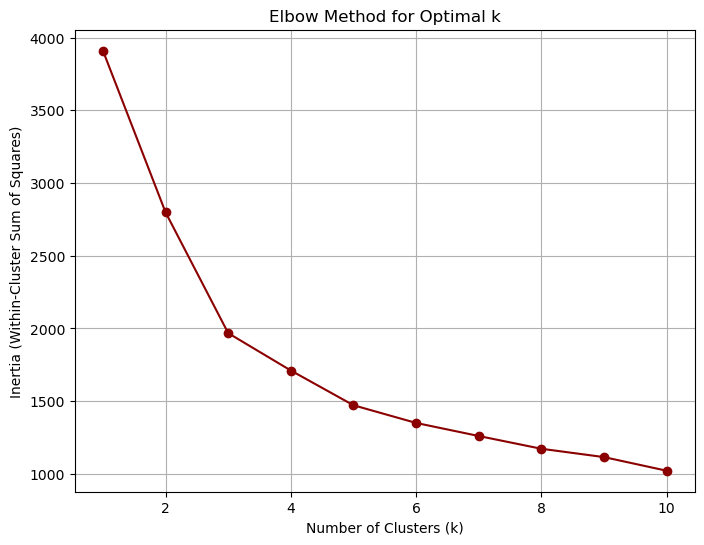

In [35]:
features = ["GDP", "Health", "Freedom", "Trust", "Generosity"]
target = "Score"
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[features])

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=90)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(K_range, inertias, marker="o", color="darkred")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.title("Elbow Method for Optimal k")
plt.grid(True)
plt.show()

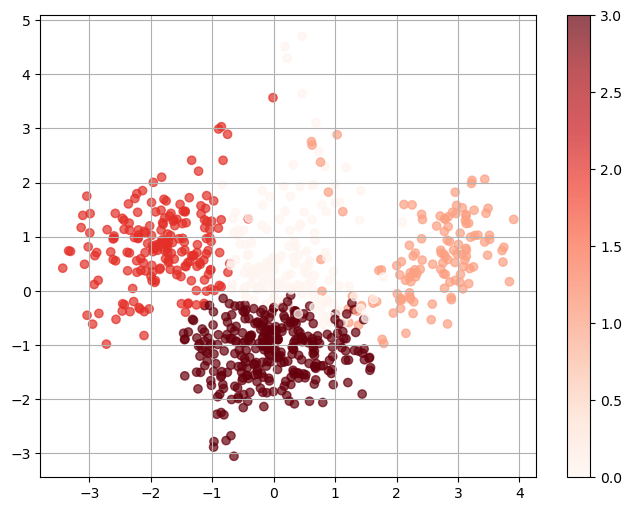

In [31]:
kmeans = KMeans(n_clusters=4, random_state=50)
data["Cluster"] = kmeans.fit_predict(X_scaled)

X = data[features]
y = data[target]

reg = LinearRegression()
reg.fit(X, y)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=data["Cluster"], cmap="Reds", alpha=0.7)
plt.colorbar(scatter)
plt.grid(True)
plt.show()

In [12]:
cluster_scores = data.groupby("Cluster")["Score"].mean().round(3)
print("Average happiness score per cluster:")
print(cluster_scores)

Average happiness score per cluster:
Cluster
0    5.420
1    6.789
2    4.158
3    5.548
Name: Score, dtype: float64


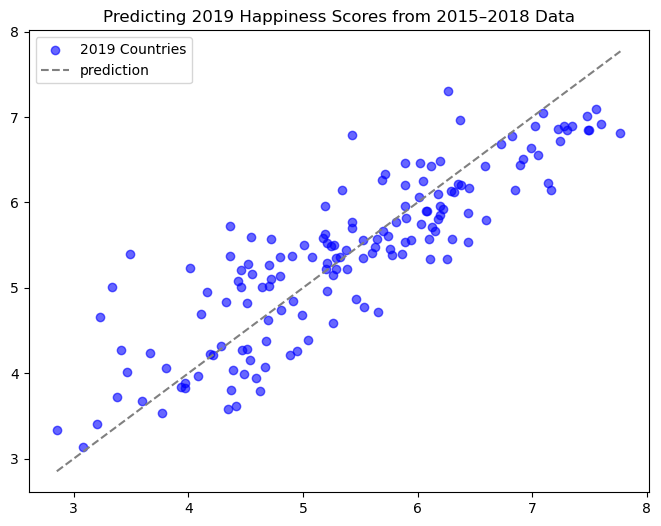

R² score on 2019 prediction: 0.7448


In [18]:
train_data = data[data["Year"] < 2019]
test_data = data[data["Year"] == 2019]

features_with_year = ["GDP", "Health", "Freedom", "Trust", "Generosity", "Year"]
target = "Score"

X_train = train_data[features_with_year]
y_train = train_data[target]

X_test = test_data[features_with_year]
y_test = test_data[target]

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred_2019 = reg.predict(X_test)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_2019, alpha=0.6, color="blue", label="2019 Countries")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="gray", linestyle="--", label="prediction")

plt.title("Predicting 2019 Happiness Scores from 2015–2018 Data")
plt.legend()
plt.show()

print("R² score on 2019 prediction:", round(r2_score(y_test, y_pred_2019), 4))